In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ast

In [3]:
def hex(n):
    for x in [(n-abs(x-int(n/2))) for x in range(n)]:
        for y in range(n-x):
            print(' ', end=''),
        for y in range(x):
            print(' * ', end=''),
        print('')

hex(10)

      *  *  *  *  * 
     *  *  *  *  *  * 
    *  *  *  *  *  *  * 
   *  *  *  *  *  *  *  * 
  *  *  *  *  *  *  *  *  * 
 *  *  *  *  *  *  *  *  *  * 
  *  *  *  *  *  *  *  *  * 
   *  *  *  *  *  *  *  * 
    *  *  *  *  *  *  * 
     *  *  *  *  *  * 


In [87]:
centroid = np.array([0,0])

def draw_points(centroid, rad, hex_num=0, max_hex=5):
    if hex_num == max_hex:
        return []
    
    apothem = ((3 * rad) ** .5) / 2
    offset = rad * 1.5
    points = []

    for d in ["top", "top-left", "top-right", "bottom", "bottom-left", "bottom-right"]:
        if d == "top":
            new_centroid = centroid + np.array([0, apothem * 2])
        if d == "bottom":
            new_centroid = centroid + np.array([0, -apothem * 2])
        if d == "top-left":
            new_centroid = centroid + np.array([-offset, apothem])
        if d == "top-right":
           new_centroid = centroid + np.array([offset, apothem])
        if d == "bottom-left":
            new_centroid = centroid + np.array([-offset, -apothem])
        if d == "bottom-right":
            new_centroid = centroid + np.array([offset, -apothem])

        points.append(new_centroid)
        points.extend(draw_points(new_centroid, rad, hex_num + 1, max_hex))

    return points

points = np.unique(centroid + draw_points(centroid, 5, 0, 5), axis=0)

In [88]:
def draw_hex(centroid, rad):
    apothem = ((3 * rad) ** .5) / 2

    points = {}

    points["top_left"] = centroid + np.array([-rad * .5, apothem])
    points["top_right"] = centroid + np.array([rad * .5, apothem])
    points["right"] = centroid + np.array([rad, 0])
    points["bottom_right"] = centroid + np.array([rad * .5, -apothem])
    points["bottom_left"] = centroid + np.array([-rad * .5, -apothem])
    points["left"] = centroid + np.array([-rad, 0])

    return list(points.values()) + [points["top_left"]]


In [122]:
centroid = np.array([0,0])

def get_hexes(starting_point, rad):
    centroids = np.unique(starting_point + draw_points(starting_point, rad, hex_num=0, max_hex=2), axis=0)

    hex_lines = []
    for c in centroids:
        hex_lines.append(draw_hex(c, rad))

    return centroids, hex_lines

centroids, hexes = get_hexes(centroid, 2)

In [123]:
x, y = np.array(centroids).T

In [144]:


test = "[{0 0} {0 2.449489742783178} {0 4.898979485566356} {-3 3.674234614174767} {3 3.674234614174767} {-3 1.224744871391589} {3 1.224744871391589} {-6 2.449489742783178} {-3 -1.224744871391589} {-6 0} {6 2.449489742783178} {3 -1.224744871391589} {6 0} {0 -2.449489742783178} {0 -4.898979485566356} {-3 -3.674234614174767} {3 -3.674234614174767} {-6 -2.449489742783178} {6 -2.449489742783178}]"
test = test.replace("{", "(").replace(" ", ",")
test = test.replace("}", ")")
x, y = np.array(ast.literal_eval(test)).T

In [145]:
test = "[{[{-1 1.224744871391589} {1 1.224744871391589} {2 0} {1 -1.224744871391589} {-1 -1.224744871391589} {-2 0} {-1 1.224744871391589}]} {[{-1 3.674234614174767} {1 3.674234614174767} {2 2.449489742783178} {1 1.224744871391589} {-1 1.224744871391589} {-2 2.449489742783178} {-1 3.674234614174767}]} {[{-1 6.123724356957945} {1 6.123724356957945} {2 4.898979485566356} {1 3.674234614174767} {-1 3.674234614174767} {-2 4.898979485566356} {-1 6.123724356957945}]} {[{-4 4.898979485566356} {-2 4.898979485566356} {-1 3.674234614174767} {-2 2.449489742783178} {-4 2.449489742783178} {-5 3.674234614174767} {-4 4.898979485566356}]} {[{2 4.898979485566356} {4 4.898979485566356} {5 3.674234614174767} {4 2.449489742783178} {2 2.449489742783178} {1 3.674234614174767} {2 4.898979485566356}]} {[{-4 2.449489742783178} {-2 2.449489742783178} {-1 1.224744871391589} {-2 0} {-4 0} {-5 1.224744871391589} {-4 2.449489742783178}]} {[{2 2.449489742783178} {4 2.449489742783178} {5 1.224744871391589} {4 0} {2 0} {1 1.224744871391589} {2 2.449489742783178}]} {[{-7 3.674234614174767} {-5 3.674234614174767} {-4 2.449489742783178} {-5 1.224744871391589} {-7 1.224744871391589} {-8 2.449489742783178} {-7 3.674234614174767}]} {[{-4 0} {-2 0} {-1 -1.224744871391589} {-2 -2.449489742783178} {-4 -2.449489742783178} {-5 -1.224744871391589} {-4 0}]} {[{-7 1.224744871391589} {-5 1.224744871391589} {-4 0} {-5 -1.224744871391589} {-7 -1.224744871391589} {-8 0} {-7 1.224744871391589}]} {[{5 3.674234614174767} {7 3.674234614174767} {8 2.449489742783178} {7 1.224744871391589} {5 1.224744871391589} {4 2.449489742783178} {5 3.674234614174767}]} {[{2 0} {4 0} {5 -1.224744871391589} {4 -2.449489742783178} {2 -2.449489742783178} {1 -1.224744871391589} {2 0}]} {[{5 1.224744871391589} {7 1.224744871391589} {8 0} {7 -1.224744871391589} {5 -1.224744871391589} {4 0} {5 1.224744871391589}]} {[{-1 -1.224744871391589} {1 -1.224744871391589} {2 -2.449489742783178} {1 -3.674234614174767} {-1 -3.674234614174767} {-2 -2.449489742783178} {-1 -1.224744871391589}]} {[{-1 -3.674234614174767} {1 -3.674234614174767} {2 -4.898979485566356} {1 -6.123724356957945} {-1 -6.123724356957945} {-2 -4.898979485566356} {-1 -3.674234614174767}]} {[{-4 -2.449489742783178} {-2 -2.449489742783178} {-1 -3.674234614174767} {-2 -4.898979485566356} {-4 -4.898979485566356} {-5 -3.674234614174767} {-4 -2.449489742783178}]} {[{2 -2.449489742783178} {4 -2.449489742783178} {5 -3.674234614174767} {4 -4.898979485566356} {2 -4.898979485566356} {1 -3.674234614174767} {2 -2.449489742783178}]} {[{-7 -1.224744871391589} {-5 -1.224744871391589} {-4 -2.449489742783178} {-5 -3.674234614174767} {-7 -3.674234614174767} {-8 -2.449489742783178} {-7 -1.224744871391589}]} {[{5 -1.224744871391589} {7 -1.224744871391589} {8 -2.449489742783178} {7 -3.674234614174767} {5 -3.674234614174767} {4 -2.449489742783178} {5 -1.224744871391589}]}]"
test = test.replace("{", "(").replace(" ", ",")
test = test.replace("}", ")")
x_hex, y_hex = np.array(ast.literal_eval(test)).T

In [124]:
x_hex, y_hex = np.array(hexes).T

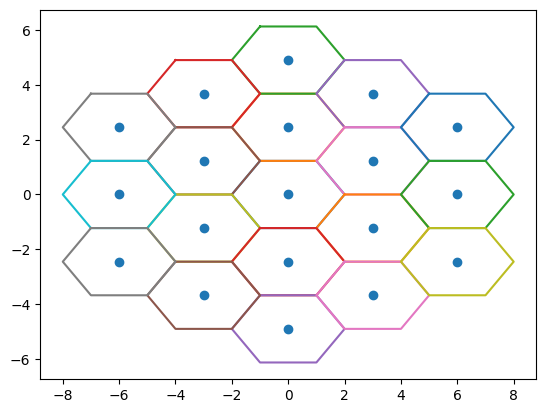

In [146]:
plt.scatter(x, y)
plt.plot(x_hex, y_hex)
plt.show()

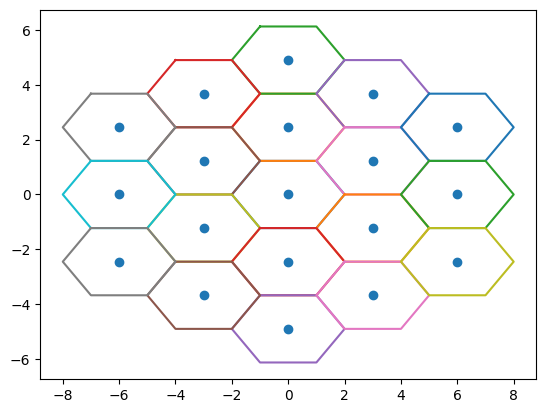

In [142]:
plt.scatter(x, y)
plt.plot(x_hex, y_hex)
plt.show()

In [32]:
addresses = ast.literal_eval("[41.9865 -86.182]".replace("{", "[").replace("}", "]").replace(" ", ","))
y, x = np.array(addresses).T

# address_polygon = ast.literal_eval("[[-4 -4] [1 1] [-3 2] [2 3] [0 5] [-10 6] [3 9] [8 9] [6 8] [7 7] [8 6] [3 0] [6 -2] [13 -4] [-4 -4]]".replace("{", "[").replace("}", "]").replace(" ", ","))
# x_ap, y_ap = np.array(address_polygon).T

hex_points = "[[39.786500000000004 -85.51700000000001] [41.6965 -84.789] [43.6065 -85.51700000000001] [43.6065 -86.965] [41.6965 -87.69500000000001] [39.786500000000004 -86.965] [39.786500000000004 -85.51700000000001]]"
hex_points = ast.literal_eval(hex_points.replace("{", "[").replace("}", "]").replace(" ", ","))
y_hex, x_hex = np.array(hex_points).T

# hex_poly = "[1,1]"
# hex_poly = ast.literal_eval(hex_poly.replace("[[[", "[[").replace("]]]", "]]").replace(" ", ","))
# x_hp, y_hp = np.array(hex_poly).T


In [34]:
def clean_string_pts(string):
    return ast.literal_eval(string.replace("{", "[").replace("}", "]").replace(" ", ","))

In [11]:
x_center = sum(x[0] for x in addresses)/len(addresses)
y_center = sum(y[1] for y in addresses)/len(addresses)

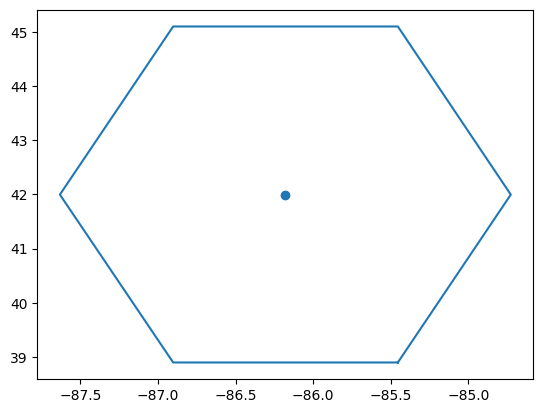

In [18]:
plt.scatter(x, y)
plt.plot(x_hex, y_hex)
# plt.plot(x_ap, y_ap)
# plt.plot(x_hp, y_hp)
# plt.scatter(x_center, y_center)
plt.show()

In [25]:
a = "[[[[-4 -4] [1 1] [-3 2] [2 3] [0 5] [-10 6] [3 9] [8 9] [6 8] [7 7] [8 6] [3 0] [6 -2] [13 -4] [-4 -4]]]]"
a = a.replace("[", "{").replace("]", "}").replace(" ", ", ")
a

'{{{{-4, -4}, {1, 1}, {-3, 2}, {2, 3}, {0, 5}, {-10, 6}, {3, 9}, {8, 9}, {6, 8}, {7, 7}, {8, 6}, {3, 0}, {6, -2}, {13, -4}, {-4, -4}}}}'

In [50]:
import math

In [57]:
a = np.array([1,1])
b = np.array([2,1])

In [58]:
(b - a)

array([1, 0])

In [59]:
math.degrees(math.atan2(*(b - a)[::-1]))
[[38.896499999999996 -85.45400000000001] [41.9965 -84.726] [45.101499999999994 -85.45400000000001] [45.101499999999994 -86.902] [41.9965 -87.632] [38.896499999999996 -86.902] [38.896499999999996 -85.45400000000001]]

0.0

In [26]:
import folium
m = folium.Map(location=(41.795926566945624, -87.59523334916474))
folium.Marker(
    location=addresses,
    icon=folium.Icon(icon="cloud"),
).add_to(m)
folium.PolyLine(hex_points).add_to(m)

In [27]:
m

In [62]:
centroids = [[41.7841599, -87.5905214], [41.7965962, -87.582055], [41.800011, -87.595481]]
m = folium.Map(location=(41.795926566945624, -87.59523334916474))
# for p in centroids:
#     folium.Marker(
#         location=p,
#         icon=folium.Icon(icon="cloud"),
#     ).add_to(m)

# folium.Polygon(centroids).add_to(m)
folium.Marker(clean_string_pts("[36.1638 -85.647]")).add_to(m)
# folium.Marker([41.7841599 + 0.02522, -87.5905214,]).add_to(m)
# folium.Marker([41.7841599 - 0.01456, -87.5905214,]).add_to(m)
# folium.Marker([41.7841599 + 0.00728, -87.5905214 + .01345,]).add_to(m)
folium.Polygon(clean_string_pts("[[36.5713 -85.622] [36.36755 -85.60938] [35.9601 -85.60938] [35.756299 -85.622] [35.9601 -85.63459] [36.36755 -85.63459] [36.5713 -85.622]]")).add_to(m)
#folium.Polygon([x[::-1] for x in clean_string_pts("[[-87.5749914 41.7841599] [-87.5827514 41.7967699] [-87.5982214 41.7967699] [-87.6060214 41.7841599] [-87.5982214 41.7715599] [-87.5827514 41.7715599] [-87.5749914 41.7841599]]")]).add_to(m)
#folium.Polygon(hex_points).add_to(m)
#folium.Polygon(clean_string_pts("[[39.786500000000004 -85.51700000000001] [41.6965 -84.789] [43.6065 -85.51700000000001] [43.6065 -86.965] [41.6965 -87.69500000000001] [39.786500000000004 -86.965] [39.786500000000004 -85.51700000000001]]")).add_to(m)
# folium.Polygon(clean_string_pts("[[39.7845 -85.51700000000001] [41.7045 -84.789] [43.6315 -85.51700000000001] [43.6315 -86.965] [41.7045 -87.69500000000001] [39.7845 -86.965] [39.7845 -85.51700000000001]]")).add_to(m)

m